# Downloading Data

In [1]:
from google.colab import drive

In [2]:
drive.mount('/drive')

Mounted at /drive


In [3]:
import pandas as pd
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2022-06-23 21:35:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-06-23 21:35:07 (91.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
imdb_data = pd.read_csv('/drive/MyDrive/NLP Datasets/IMDB Dataset.csv')

In [5]:
imdb_data.shape

(50000, 2)

In [6]:
imdb_data.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
# How many examples of each class?
imdb_data.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

# Handling categorical column

In [8]:
imdb_data.dtypes

review       object
sentiment    object
dtype: object

We are gonna explore multiple methods of converting categorical columns to numerical ones.

## Method 1

In [9]:
cats = {"sentiment":{
    "positive":1,
    "negative":0
}}

In [10]:
imdb_catcoded_1 = imdb_data.replace(cats)

In [11]:
imdb_catcoded_1.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [12]:
imdb_catcoded_1.tail(5)

,review,sentiment
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0
49999,No one expects the Star Trek movies to be high...,0


## Method 2

In [13]:
imdb_data_2 = imdb_data

In [14]:
imdb_data_2['sentiment']= imdb_data_2['sentiment'].astype('category')
imdb_data_2['sentiment'] = imdb_data_2['sentiment'].cat.codes

In [15]:
imdb_data_2.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


## Method 3

In [16]:
imdb_data_3 = imdb_data

In [17]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()

imdb_data_3["sentiment"] = ord_enc.fit_transform(imdb_data_3[["sentiment"]])
imdb_data_3["sentiment"].astype(float)

0        1.0
1        1.0
2        1.0
3        0.0
4        1.0
        ... 
49995    1.0
49996    0.0
49997    0.0
49998    0.0
49999    0.0
Name: sentiment, Length: 50000, dtype: float64

In [18]:
imdb_data_3.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1.0
1,A wonderful little production. <br /><br />The...,1.0
2,I thought this was a wonderful way to spend ti...,1.0
3,Basically there's a family where a little boy ...,0.0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1.0


We are gonna use the first method so let's use it to convert our `sentiment` column.

In [19]:
imdb_data = imdb_data.replace(cats)

In [20]:
imdb_data.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1.0
1,A wonderful little production. <br /><br />The...,1.0
2,I thought this was a wonderful way to spend ti...,1.0
3,Basically there's a family where a little boy ...,0.0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1.0


In [21]:
imdb_data.tail(5)

,review,sentiment
49995,I thought this movie did a down right good job...,1.0
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0.0
49997,I am a Catholic taught in parochial elementary...,0.0
49998,I'm going to have to disagree with the previou...,0.0
49999,No one expects the Star Trek movies to be high...,0.0


# Splitting and Visualizing

In [22]:
# Shuffle training dataframe
train_df_shuffled = imdb_data.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
train_df_shuffled.shape, train_df_shuffled.head(5)

((50000, 2),
                                                   review  sentiment
 33553  I really liked this Summerslam due to the look...        1.0
 9427   Not many television shows appeal to quite as m...        1.0
 199    The film quickly gets to a major chase scene w...        0.0
 12447  Jane Austen would definitely approve of this o...        1.0
 39489  Expectations were somewhat high for me when I ...        0.0)

In [23]:
# Let's visualize some random training examples
import random
random_index = random.randint(0, len(imdb_data)-5) # create random indexes not higher than the total number of samples
for row in train_df_shuffled[["review", "sentiment"]][random_index:random_index+5].itertuples():
  _, text, sentiment = row
  print(f"Target: {sentiment}", "(positive review)" if sentiment > 0 else "(negative review)")
  print(f"Text: {text}\n")
  print("---\n")

Target: 1.0 (positive review)
Text: After seeing The Aristocats: Special Edition in a two pack with The Fox in the Hound, I decided to buy it since both of these films were childhood favourites.<br /><br />The Aristocats is a classic, definitely. It might not be a five-star classic, but it is a fun film and makes a good evening's entertainment. It is somewhat a light refreshment from the darker, more serious Disney classics. The Aristocats tries to be a light-hearted musical comedy, and I think it just about succeeds.<br /><br />The storyline doesn't really make much sense and I don't think the plot is particularly strong, but it is certainly not weak. The animation and backgrounds are a bit scratchy in places, typical of Disney's 70s films, but it does have a rustic, old fashioned charm about it.<br /><br />The Aristocats strongest points are the characters, the music and the humour. The music is very memorable - try getting 'Everybody Wants To Be A Cat' out your head in a hurry! The 

In [24]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(imdb_data["review"].to_numpy(),
                                                                            imdb_data["sentiment"].to_numpy(),
                                                                            test_size=0.2, # dedicate 10% of samples to validation set
                                                                            random_state=42) # random state for reproducibility

In [25]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(40000, 40000, 10000, 10000)

In [26]:
# View the first 10 training sentences and their labels
train_sentences[:10], train_labels[:10]

(array(['That\'s what I kept asking myself during the many fights, screaming matches, swearing and general mayhem that permeate the 84 minutes. The comparisons also stand up when you think of the one-dimensional characters, who have so little depth that it is virtually impossible to care what happens to them. They are just badly written cyphers for the director to hang his multicultural beliefs on, a topic that has been done much better in other dramas both on TV and the cinema.<br /><br />I must confess, I\'m not really one for spotting bad performances during a film, but it must be said that Nichola Burley (as the heroine\'s slutty best friend) and Wasim Zakir (as the nasty, bullying brother) were absolutely terrible. I don\'t know what acting school they graduated from, but if I was them I\'d apply for a full refund post haste. Only Samina Awan in the lead role manages to impress in a cast of so-called British talent that we\'ll probably never hear from again. At least, that\'s the 

# Text vectorization (tokenization)

In [27]:
import tensorflow as tf

# Use the default TextVectorization variables
text_vectorizer = tf.keras.layers.TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                                    standardize="lower_and_strip_punctuation", # how to process text
                                                    split="whitespace", # how to split tokens
                                                    ngrams=None, # create groups of n-words?
                                                    output_mode="int", # how to map tokens to numbers
                                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [28]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

231

This is a slightly larger dataset with ~double the size of sentences than the yelp dataset, so we will see how Recurrent Neural Networks Perform on this

In [29]:
from tensorflow.keras.layers import TextVectorization

# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [30]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [31]:
# Create sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 215,    4, 6848,    8,   54,  948,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [32]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
I'm sorry, but I just can't help it, I love watching Iron Eagle. Now, do not misunderstand me, I am not saying that this is a great movie. No, rather, I would put it that this is an endlessly entertaining movie. For people who cut this movie to pieces for not being realistic are kinda missing the point. Of course Iron Eagle's plot was ridiculous. But I believe its target audience was kids, and I sure remember finding this cool when I was little. Now I just find it amusing as a guilty pleasure, kinda like Road House. This movie is part of the great pantheon of 80's, kids-taking-on-the-stodgy-adult-power-structure movies. You must remember D.A.R.Y.L, Real Genius, E.T., etc. If you ask me, just watching Doug and Knotcher "Ride the Snake" in the beginning is worth the cost of the DVD. That whole sequence was so STUPID! But, at the same time, it was hilarious, funny, totally 80's, all that good stuff. So bottom line, Iron Eagle is a great 80's guilty pleasure. The hairstyles,

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 142,  763,   19,   10,   40,  174,  336,    9,   10,  112,  146,
        4122, 7245,  149,   77]])>

In [33]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'and', 'a']
Bottom 5 least common words: ['dreyfuss', 'dogma', 'discussions', 'discipline', 'dimensions']


# Embedding Layer

In [34]:
tf.random.set_seed(42)
from tensorflow.keras.layers import Embedding

embedding = Embedding(input_dim=max_vocab_length, # set input shape
                      output_dim=128, # set size of embedding vector
                      embeddings_initializer="uniform", # default, intialize randomly
                      input_length=max_length, # how long is each input
                      name="embedding_1") 

embedding

In [35]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
Yes, I felt like I had been gutted after first seeing it. But not until the next day did I begin to see the true brilliance of this creation. I won't repeat much of what has already been said by those who appreciate the film, but there is one new area I want to touch on... **SPOILERS** Why exactly did the teacher put the broken glass in the student's pocket? Most reviewers have noted that it only reflected her cruelty and reaction to an unsatisfactory performance. I must disagree. Watch the scene again. Huppert is moved to tears as she watches her student playing on stage. The student is quite an expressive girl (crying & vocalizing her fears)- just the opposite of Huppert's character. There is a scene later in the film, after the girl is injured, when Huppert discusses the accident with the girl's mother. The mother, visibly upset, states "We gave up everything so she could study piano" and Huppert immediately snaps "You mean SHE gave up everything, don't you."<br /><br

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 1.40730254e-02, -2.31848247e-02,  2.45943666e-05, ...,
          1.65633224e-02,  4.49469127e-02,  1.35319345e-02],
        [-3.50819454e-02,  1.44847147e-02,  5.13797998e-03, ...,
          4.48515527e-02,  3.97636406e-02, -3.54361907e-02],
        [-1.86735392e-02, -3.29848155e-02, -1.06270686e-02, ...,
          2.29313262e-02,  2.78601758e-02,  4.08717506e-02],
        ...,
        [ 2.27151848e-02, -3.20442915e-02,  1.66398287e-03, ...,
         -8.96944851e-03, -2.77845860e-02, -4.29066792e-02],
        [ 3.21087874e-02,  1.65066756e-02,  1.40311830e-02, ...,
          1.47701167e-02,  3.27510871e-02,  3.08426470e-03],
        [-1.65944323e-02,  1.00136288e-02,  2.66844034e-03, ...,
          1.60881914e-02, -3.40095051e-02, -2.45498307e-02]]],
      dtype=float32)>

In [36]:
# Check out a single token's embedding
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 1.40730254e-02, -2.31848247e-02,  2.45943666e-05,  4.32557128e-02,
        2.16743611e-02, -4.45352569e-02,  3.57022993e-02,  7.18886778e-03,
       -2.17120890e-02,  6.64915890e-03,  4.14780714e-02,  6.21144846e-03,
        2.13538744e-02, -4.40125950e-02,  3.63845862e-02,  4.31442596e-02,
        1.04759708e-02, -3.47093828e-02,  1.17167458e-02, -8.10753182e-03,
        4.33361530e-03,  3.66550945e-02,  2.83457674e-02,  3.38818096e-02,
        3.11259292e-02,  1.86030529e-02,  1.12861395e-03,  2.72339098e-02,
        4.99058701e-02, -4.19099107e-02,  2.96626128e-02,  9.93553549e-03,
       -2.77405381e-02,  8.86525959e-03, -9.24371183e-04,  4.10688184e-02,
       -2.56628282e-02,  6.65890053e-03,  4.56148498e-02, -1.77531242e-02,
       -1.73868313e-02,  3.04127447e-02,  7.48013332e-03, -4.12644744e-02,
       -2.12724451e-02,  2.33822130e-02,  2.01295726e-02, -3.14401388e-02,
        4.81969453e-02,  4.86204661e-02,  4.09673192

# Baseline Model : Naive Bayes

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [38]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 86.35%


In [39]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 0.])

In [40]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [41]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 86.35000000000001,
 'f1': 0.8634395461109965,
 'precision': 0.8644863715548691,
 'recall': 0.8635}

# Model 1: A simple dense model

In [42]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

In [43]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [44]:
# Get a summary of the model
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [45]:
# Fit the model
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
1250/1250 [==============================] - 11s 6ms/step - loss: 0.5984 - accuracy: 0.6739 - val_loss: 0.5615 - val_accuracy: 0.7042
Epoch 2/5
1250/1250 [==============================] - 7s 6ms/step - loss: 0.5088 - accuracy: 0.7492 - val_loss: 0.5637 - val_accuracy: 0.7088
Epoch 3/5
1250/1250 [==============================] - 7s 6ms/step - loss: 0.4773 - accuracy: 0.7696 - val_loss: 0.5779 - val_accuracy: 0.7012
Epoch 4/5
1250/1250 [==============================] - 7s 6ms/step - loss: 0.4598 - accuracy: 0.7789 - val_loss: 0.5921 - val_accuracy: 0.7002
Epoch 5/5
1250/1250 [==============================] - 7s 6ms/step - loss: 0.4482 - accuracy: 0.7863 - val_loss: 0.6057 - val_accuracy: 0.6979


In [46]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.6057 - accuracy: 0.6979


[0.6056683659553528, 0.6978999972343445]

In [47]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[-0.11563093,  0.13729468, -0.1390477 , ..., -0.16863911,
         -0.11325146,  0.12706025],
        [ 0.0395038 , -0.03329949, -0.03419673, ...,  0.01194134,
          0.03438206,  0.02659249],
        [ 0.02147713,  0.03477412,  0.01347086, ..., -0.05110358,
         -0.03045834, -0.00156695],
        ...,
        [ 0.12656367, -0.16491565,  0.1165282 , ...,  0.18022917,
          0.1615209 , -0.13690914],
        [-0.05602586,  0.12081904, -0.0888207 , ..., -0.12294389,
         -0.07914767,  0.10369805],
        [-0.16675712,  0.19221689, -0.20682998, ..., -0.15238522,
         -0.21881865,  0.14998798]], dtype=float32)>]

In [48]:
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [49]:
# Make predictions (these come back in the form of probabilities)
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10] # only print out the first 10 prediction probabilities

array([[0.80408233],
       [0.9371754 ],
       [0.23374875],
       [0.6992808 ],
       [0.35304055],
       [0.76282775],
       [0.8491663 ],
       [0.40683427],
       [0.6162203 ],
       [0.53394747]], dtype=float32)

In [50]:
# Turn prediction probabilities into single-dimension tensor of floats
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs)) # squeeze removes single dimensions
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 1.], dtype=float32)>

In [51]:
# Calculate model_1 metrics
model_1_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 69.78999999999999,
 'f1': 0.6978066697788927,
 'precision': 0.697991046075714,
 'recall': 0.6979}

In [52]:
# Is our simple Keras model better than our baseline model?
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

In [53]:
# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

compare_baseline_to_new_results(baseline_results=baseline_results, 
                                new_model_results=model_1_results)

Baseline accuracy: 86.35, New accuracy: 69.79, Difference: -16.56
Baseline precision: 0.86, New precision: 0.70, Difference: -0.17
Baseline recall: 0.86, New recall: 0.70, Difference: -0.17
Baseline f1: 0.86, New f1: 0.70, Difference: -0.17


Ok so a simple dense model performed poorly because Fully Connected Neural Networks don't have backward propagation adn they also dont have gated units, let's see how RNNs peform now.

# Model 2: LSTM (Recurrent Neural Networks)

In [54]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")


# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 15, 128)
(None, 64)


In [55]:
# Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [56]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [57]:
# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
1250/1250 [==============================] - 21s 13ms/step - loss: 0.5815 - accuracy: 0.6793 - val_loss: 0.5617 - val_accuracy: 0.7026
Epoch 2/5
1250/1250 [==============================] - 12s 10ms/step - loss: 0.4848 - accuracy: 0.7571 - val_loss: 0.5619 - val_accuracy: 0.7029
Epoch 3/5
1250/1250 [==============================] - 10s 8ms/step - loss: 0.4150 - accuracy: 0.7973 - val_loss: 0.6147 - val_accuracy: 0.6945
Epoch 4/5
1250/1250 [==============================] - 10s 8ms/step - loss: 0.3463 - accuracy: 0.8345 - val_loss: 0.7059 - val_accuracy: 0.6912
Epoch 5/5
1250/1250 [==============================] - 10s 8ms/step - loss: 0.2822 - accuracy: 0.8692 - val_loss: 0.8395 - val_accuracy: 0.6918


In [58]:
# Make predictions on the validation dataset
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10] # view the first 10

((10000, 1), array([[0.9912158 ],
        [0.8613804 ],
        [0.5553316 ],
        [0.55017096],
        [0.24021396],
        [0.99825615],
        [0.95182914],
        [0.624277  ],
        [0.07967749],
        [0.9013357 ]], dtype=float32))

In [59]:
# Round out predictions and reduce to 1-dimensional array
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 0., 1., 1., 1., 0., 1.], dtype=float32)>

In [60]:
# Calculate LSTM model results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 69.17999999999999,
 'f1': 0.6915470038165861,
 'precision': 0.6921605063941819,
 'recall': 0.6918}

In [61]:
# Compare model 2 to baseline
compare_baseline_to_new_results(baseline_results, model_2_results)

Baseline accuracy: 86.35, New accuracy: 69.18, Difference: -17.17
Baseline precision: 0.86, New precision: 0.69, Difference: -0.17
Baseline recall: 0.86, New recall: 0.69, Difference: -0.17
Baseline f1: 0.86, New f1: 0.69, Difference: -0.17


# Model 3: Gated Recurrent Unit

In [62]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x) 
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [63]:
# Compile GRU model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [64]:
# Get a summary of the GRU model
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [65]:
# Fit model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
1250/1250 [==============================] - 11s 8ms/step - loss: 0.5870 - accuracy: 0.6746 - val_loss: 0.5552 - val_accuracy: 0.7063
Epoch 2/5
1250/1250 [==============================] - 10s 8ms/step - loss: 0.4856 - accuracy: 0.7605 - val_loss: 0.5591 - val_accuracy: 0.7014
Epoch 3/5
1250/1250 [==============================] - 10s 8ms/step - loss: 0.4049 - accuracy: 0.8090 - val_loss: 0.6124 - val_accuracy: 0.6967
Epoch 4/5
1250/1250 [==============================] - 9s 7ms/step - loss: 0.3245 - accuracy: 0.8509 - val_loss: 0.7038 - val_accuracy: 0.6908
Epoch 5/5
1250/1250 [==============================] - 9s 7ms/step - loss: 0.2628 - accuracy: 0.8805 - val_loss: 0.8768 - val_accuracy: 0.6834


In [66]:
# Make predictions on the validation data
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

((10000, 1), array([[0.9865318 ],
        [0.81680226],
        [0.7823448 ],
        [0.3669471 ],
        [0.20133846],
        [0.9994634 ],
        [0.9788633 ],
        [0.6616423 ],
        [0.00755345],
        [0.85518205]], dtype=float32))

In [67]:
# Convert prediction probabilities to prediction classes
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 0., 1.], dtype=float32)>

In [68]:
# Calcuate model_3 results
model_3_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 68.34,
 'f1': 0.6832892580575124,
 'precision': 0.6834945567329671,
 'recall': 0.6834}

In [69]:
# Compare to baseline
compare_baseline_to_new_results(baseline_results, model_3_results)

Baseline accuracy: 86.35, New accuracy: 68.34, Difference: -18.01
Baseline precision: 0.86, New precision: 0.68, Difference: -0.18
Baseline recall: 0.86, New recall: 0.68, Difference: -0.18
Baseline f1: 0.86, New f1: 0.68, Difference: -0.18


# Model 4: Bidirectonal RNN model

In [70]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_4")

# Build a Bidirectional RNN in TensorFlow
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_4_embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # stacking RNN layers requires return_sequences=True
x = layers.Bidirectional(layers.LSTM(64))(x) # bidirectional goes both ways so has double the parameters of a regular LSTM layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")

In [71]:
# Compile
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [72]:
# Get a summary of our bidirectional model
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_4 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [73]:
# Fit the model (takes longer because of the bidirectional layers)
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
1250/1250 [==============================] - 16s 10ms/step - loss: 0.5786 - accuracy: 0.6818 - val_loss: 0.5569 - val_accuracy: 0.7065
Epoch 2/5
1250/1250 [==============================] - 12s 10ms/step - loss: 0.4836 - accuracy: 0.7569 - val_loss: 0.5561 - val_accuracy: 0.7098
Epoch 3/5
1250/1250 [==============================] - 12s 10ms/step - loss: 0.4057 - accuracy: 0.8024 - val_loss: 0.6116 - val_accuracy: 0.6967
Epoch 4/5
1250/1250 [==============================] - 12s 10ms/step - loss: 0.3222 - accuracy: 0.8500 - val_loss: 0.7221 - val_accuracy: 0.6889
Epoch 5/5
1250/1250 [==============================] - 12s 10ms/step - loss: 0.2449 - accuracy: 0.8887 - val_loss: 0.9351 - val_accuracy: 0.6910


In [74]:
# Make predictions with bidirectional RNN on the validation data
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

array([[0.97928864],
       [0.16739152],
       [0.6799975 ],
       [0.11169963],
       [0.2505916 ],
       [0.99867624],
       [0.8288305 ],
       [0.50787807],
       [0.595297  ],
       [0.75206923]], dtype=float32)

In [75]:
# Convert prediction probabilities to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [76]:
# Calculate bidirectional RNN model results
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accuracy': 69.1,
 'f1': 0.690728140216509,
 'precision': 0.6913925373291906,
 'recall': 0.691}

In [77]:
# Check to see how the bidirectional model performs against the baseline
compare_baseline_to_new_results(baseline_results, model_4_results)

Baseline accuracy: 86.35, New accuracy: 69.10, Difference: -17.25
Baseline precision: 0.86, New precision: 0.69, Difference: -0.17
Baseline recall: 0.86, New recall: 0.69, Difference: -0.17
Baseline f1: 0.86, New f1: 0.69, Difference: -0.17


# Model 5: Conv1D

In [78]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_5")

# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

# Compile Conv1D model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary of our 1D convolution model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_4 (Dense)             (None, 1)              

In [79]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
1250/1250 [==============================] - 16s 7ms/step - loss: 0.5902 - accuracy: 0.6696 - val_loss: 0.5569 - val_accuracy: 0.7020
Epoch 2/5
1250/1250 [==============================] - 8s 7ms/step - loss: 0.4637 - accuracy: 0.7787 - val_loss: 0.5684 - val_accuracy: 0.7039
Epoch 3/5
1250/1250 [==============================] - 8s 7ms/step - loss: 0.3309 - accuracy: 0.8605 - val_loss: 0.6297 - val_accuracy: 0.6965
Epoch 4/5
1250/1250 [==============================] - 8s 7ms/step - loss: 0.1947 - accuracy: 0.9293 - val_loss: 0.7422 - val_accuracy: 0.6903
Epoch 5/5
1250/1250 [==============================] - 8s 7ms/step - loss: 0.0985 - accuracy: 0.9712 - val_loss: 0.8971 - val_accuracy: 0.6853


In [80]:
# Make predictions with model_5
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

array([[0.99966383],
       [0.6644798 ],
       [0.4262022 ],
       [0.223553  ],
       [0.3378353 ],
       [0.8616272 ],
       [0.99014413],
       [0.6069096 ],
       [0.00846962],
       [0.02308312]], dtype=float32)

In [81]:
# Convert model_5 prediction probabilities to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 0., 0., 0., 1., 1., 1., 0., 0.], dtype=float32)>

In [82]:
# Calculate model_5 evaluation metrics 
model_5_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 68.53,
 'f1': 0.6851813449516458,
 'precision': 0.6854094962917048,
 'recall': 0.6853}

# Model 6: TensorFlow Hub Pretrained Sentence Encoder

In [83]:
# Example of pretrained embedding with universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.01157028  0.0248591   0.02878048 -0.012715    0.03971538  0.0882776
  0.02680984  0.05589836 -0.0106873  -0.00597291  0.00639323 -0.01819518
  0.00030813  0.09105888  0.05874644 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865347 -0.04209306  0.02678981  0.03011006  0.00321069
 -0.00337973 -0.04787357  0.0226672  -0.00985925 -0.04063613 -0.01292092
 -0.04666384  0.05630299 -0.03949255  0.00517686  0.02495829 -0.0701444
  0.02871508  0.04947684 -0.00633979 -0.08960192  0.02807118 -0.00808364
 -0.01360602  0.0599865  -0.10361787 -0.05195374  0.00232954 -0.02332531
 -0.03758105  0.03327728], shape=(50,), dtype=float32)


In [84]:
# Each sentence has been encoded into a 512 dimension vector
embed_samples[0].shape

TensorShape([512])

In [85]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model 
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [86]:
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [87]:
# Train a classifier on top of pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
1250/1250 [==============================] - 61s 47ms/step - loss: 0.3553 - accuracy: 0.8461 - val_loss: 0.3214 - val_accuracy: 0.8610
Epoch 2/5
1250/1250 [==============================] - 68s 54ms/step - loss: 0.3230 - accuracy: 0.8577 - val_loss: 0.3308 - val_accuracy: 0.8542
Epoch 3/5
1250/1250 [==============================] - 61s 49ms/step - loss: 0.3178 - accuracy: 0.8619 - val_loss: 0.3179 - val_accuracy: 0.8630
Epoch 4/5
1250/1250 [==============================] - 70s 56ms/step - loss: 0.3130 - accuracy: 0.8637 - val_loss: 0.3125 - val_accuracy: 0.8656
Epoch 5/5
1250/1250 [==============================] - 58s 47ms/step - loss: 0.3076 - accuracy: 0.8659 - val_loss: 0.3137 - val_accuracy: 0.8654


In [88]:
# Make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

array([[0.6785186 ],
       [0.9737384 ],
       [0.0274232 ],
       [0.901999  ],
       [0.16228668],
       [0.98643976],
       [0.98138463],
       [0.30772552],
       [0.32684666],
       [0.17148851]], dtype=float32)

In [89]:
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 0., 1., 0., 1., 1., 0., 0., 0.], dtype=float32)>

In [90]:
# Calculate model 6 performance metrics
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': 86.53999999999999,
 'f1': 0.8653680144340786,
 'precision': 0.866015203029912,
 'recall': 0.8654}

In [91]:
# Compare TF Hub model to baseline
compare_baseline_to_new_results(baseline_results, model_6_results)

Baseline accuracy: 86.35, New accuracy: 86.54, Difference: 0.19
Baseline precision: 0.86, New precision: 0.87, Difference: 0.00
Baseline recall: 0.86, New recall: 0.87, Difference: 0.00
Baseline f1: 0.86, New f1: 0.87, Difference: 0.00


# Comparing the performance of each of our models

In [92]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,86.35,0.864486,0.8635,0.863440
simple_dense,69.79,0.697991,0.6979,0.697807
lstm,69.18,0.692161,0.6918,0.691547
gru,68.34,0.683495,0.6834,0.683289
bidirectional,69.10,0.691393,0.6910,0.690728
conv1d,68.53,0.685409,0.6853,0.685181
tf_hub_sentence_encoder,86.54,0.866015,0.8654,0.865368


In [93]:

# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

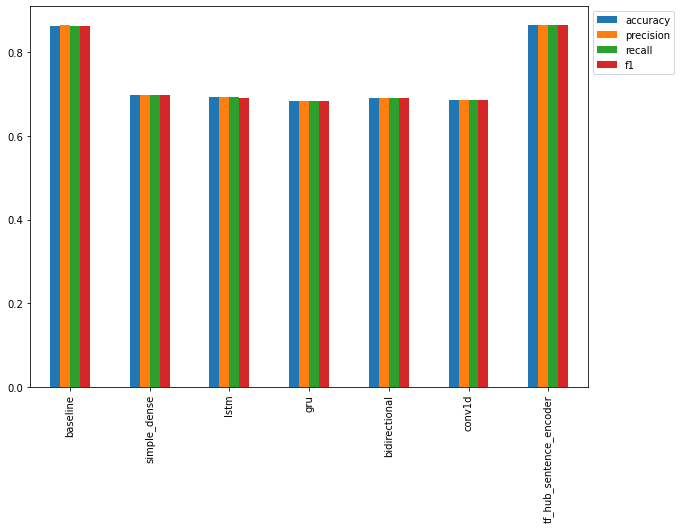

In [94]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

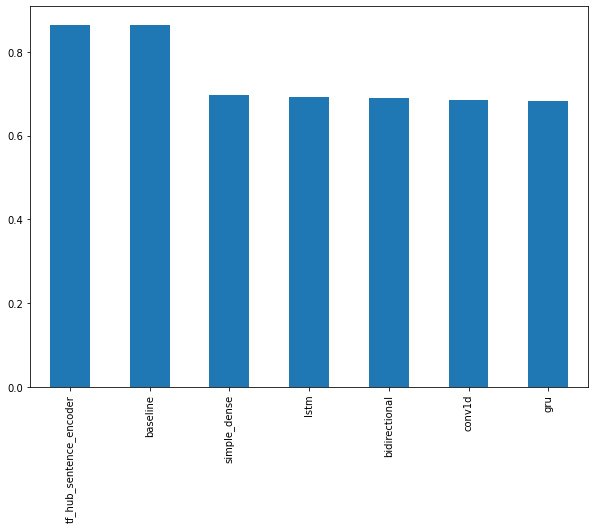

In [95]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

# Predictions on custom data

In [98]:
review_1 = "I get why some people hate this. It's because of the political message and how some people think that you need get empathy for Arthur's madness. But come on that is not the point and it will never be. Enjoy this masterpiece because Joaquin Phoenix and Todd Phillips overdid themselves with this movie. The acting,music and cinematography are just amazing ! Please enjoy the movie without overthinking it."
review_2 = "Let me start off by saying if Joaquin Phoneix doesn't get his Oscar for this movie. Then the Oscars should be cancelled. Phoneix is amazing as you might've heard from every review ever! But Todd Phillips. Is at his best here. The story lines he takes and visuals are just breathtaking. The score!! Omg the Score! Every time that score came on, I felt very uncomfortable, like something horrible was about to happen. It was GREAT. The Inspirations from Taxi Driver and King of Comedy are there, and add so much for the movie. And I got to be honest. There are scenes that are very violent. And its disturbing. But I honestly expected it to be WAYYYY more violent from all the controversy going on. Overall this movie was GREAT. Come Oscar season, it needs to be nominated for Best Picture, ScreenPlay, Cinematography, Actor, Score and Director."
review_3 = "Every once in a while a movie comes, that truly makes an impact. Joaquin's performance and scenography in all it's brilliance. Grotesque, haunting and cringy. Hard to watch at times,... but so mesmerizing, you won't blink an eye watching it. Tragic, but with seriously funny moments. Emotional rollercoaster - sometimes, with multiple emotions popping-up at the same time.this is far from a typical action-riddled predictable super-hero movie - it's a proper psychological thriller/drama, with the single best character development I have ever seen."
review_4 = "I was underwhelmed - to say it friendly - but not surprised by the fact. Because Hollywood has lost its magic looong time ago. IMHO no. bo. dy gives a damn about Darth Vader's Childhood or Joker's relationship with his mother. All we want for centuries is a proper boogeyman. If you overpaid LaLaLand-Schmocks won't jump from the stupid Prequel-explains-it-all-train - please give us at least solid filmmaking. Joker is a mess. No story, no finesse, no build-up, no surprises, no ideas. But a load of layman-psychology that should make even 12y olds roll their eyes; a cacophony of more or less unrelated scenes; cheesy taxi-driver-moments without any impact; massive overacting by Phoenix and no subtle sinister Joker moments except for the two second Elevator-Scene we all know (and love) from the trailer. rating 9.0? A joke. Heath Ledger, I miss you."
review_5 = "This movie represents everything wrong with Hollywood. Take an existing thing, make vast changes to it to the point it is no longer the thing it was, yet still call it the same thing to profit off its popularity.This story is of a loser at the end of his ropes. His life was sad, pathetic and he is powerless and thus...of course, lashes out at the world for it. This is a millennial's story. A person that blames everyone else, is a victim. There is no strength in this character. He isnt scary. He isnt a thing to be feared. This so called Joker, because he is without strength, knowledge could never be what the Joker actually is. Hard to kill, vastly intelligent and a criminal master-mind."
review_6 = "Basically a bad remake of taxi driver with bits of King of Comedy thrown in to replace the underage prostitute parts ... oh and lets throw a little batman stuff in there too to link it to those popular superhero movies . problem is unlike Taxi Driver the main character is very unappealing , unlikable , and hard to sympathise with ... not just getting retribution on those who have wronged him Bronson style - he's more American Psycho killing basically innocent people for fun . Glamorising violence against inocent people by the mentally disturbed not a great message to be putting out there nowadays . also wayyyy too much time wasted on Phoenix dancing and mugging to the camera - they could have cut out 45 minutes and still made the same movie just less long and boring ."

In [99]:
def pred_and_prob_sentence(sentence):
    pred_prob = tf.squeeze(model_6.predict([sentence])) # has to be list
    pred = tf.round(pred_prob)
    print(f"Pred: {int(pred)}", "(positive review)" if pred > 0 else "(negative review)", f", Prob: {pred_prob}")

In [100]:
pred_and_prob_sentence(review_1)

Pred: 0 (negative review) , Prob: 0.3780796527862549


In [101]:
pred_and_prob_sentence(review_2)

Pred: 1 (positive review) , Prob: 0.7319397926330566


In [102]:
pred_and_prob_sentence(review_3)

Pred: 1 (positive review) , Prob: 0.9770364165306091


In [103]:
pred_and_prob_sentence(review_4)

Pred: 0 (negative review) , Prob: 0.12354516237974167


In [104]:
pred_and_prob_sentence(review_5)

Pred: 0 (negative review) , Prob: 0.024100353941321373


In [105]:
pred_and_prob_sentence(review_6)

Pred: 0 (negative review) , Prob: 0.012634938582777977
